In [1]:
# 2009년까지 train
# 그이후로 test

In [2]:
library(fpp2)
library(forecast)

Loading required package: ggplot2

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Loading required package: expsmooth



In [3]:
elecequip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,79.35,75.78,86.32,72.60,74.86,83.81,79.80,62.41,85.41,83.11,84.21,89.70
1997,78.64,77.42,89.86,81.27,78.68,89.51,83.67,69.80,91.09,89.43,91.04,92.87
1998,81.87,85.36,92.98,81.09,85.64,91.14,83.46,66.37,93.34,85.93,86.81,93.30
1999,81.59,81.77,91.24,79.45,86.99,96.60,97.99,79.13,103.56,100.89,99.40,111.80
2000,95.30,97.77,116.23,100.98,104.07,114.64,107.62,96.12,123.50,116.12,116.86,128.61
2001,100.56,103.05,119.06,92.46,98.75,111.14,96.13,79.72,102.07,96.18,101.26,109.85
2002,89.52,89.27,104.35,87.05,89.33,102.20,88.13,75.68,99.48,96.40,96.16,101.00
2003,89.34,86.91,98.90,85.54,85.25,101.14,91.80,76.98,104.33,99.72,101.06,109.00
2004,89.88,92.27,105.11,91.50,92.56,104.35,96.21,79.58,105.43,99.18,99.77,113.55
2005,91.65,90.56,105.52,92.18,91.22,109.04,99.26,83.36,110.80,104.95,107.07,114.40


In [5]:
is.ts(elecequip)
frequency(elecequip)
start(elecequip)
end(elecequip)

[1] TRUE

[1] 12

[1] 1996    1

[1] 2012    3

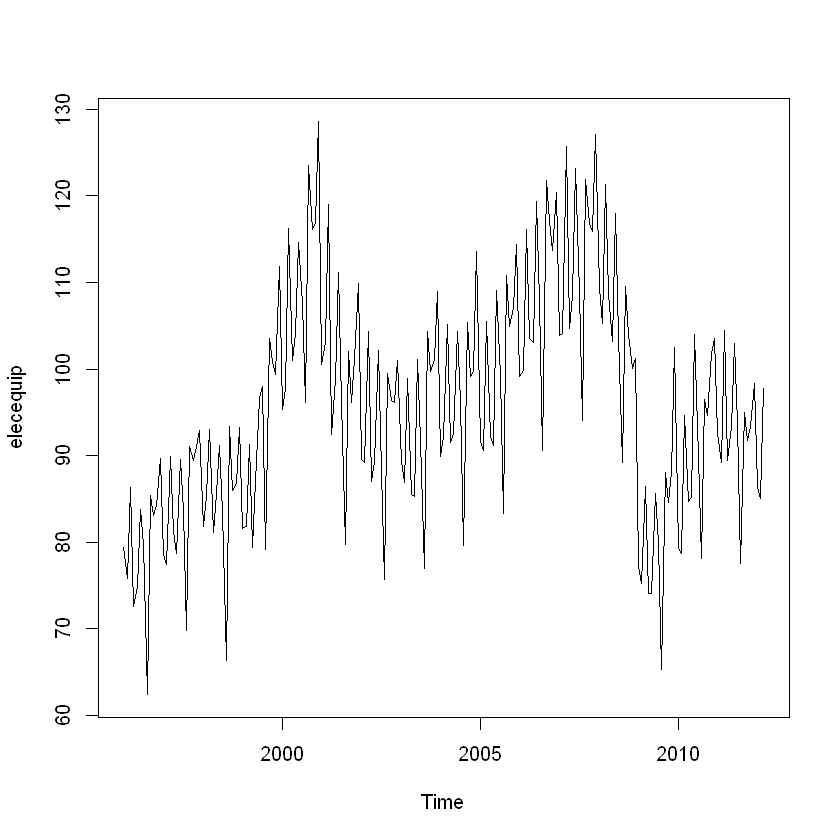

In [6]:
plot(elecequip)

In [7]:
summary(elecequip)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  62.41   86.12   94.68   95.69  104.05  128.61 

1. elecequip 데이터 분석
    - 기간: 1996년 1월~2012년3월 데이터
    - 시계열 데이터 형태
    - 월별 데이터
    - 기술 통계량 값 : summary(elecequip)

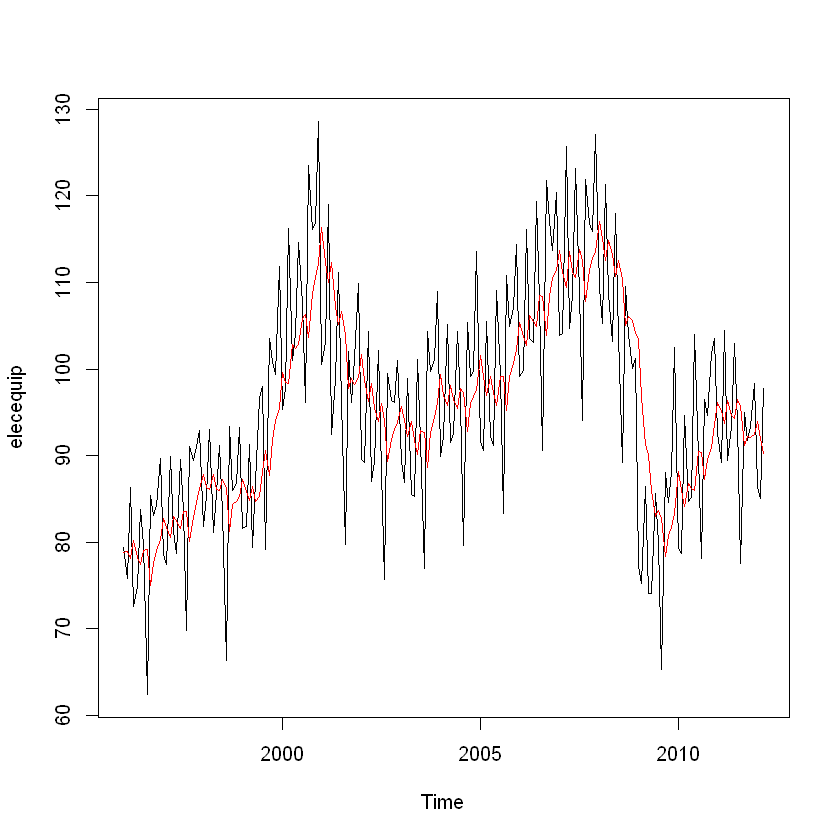

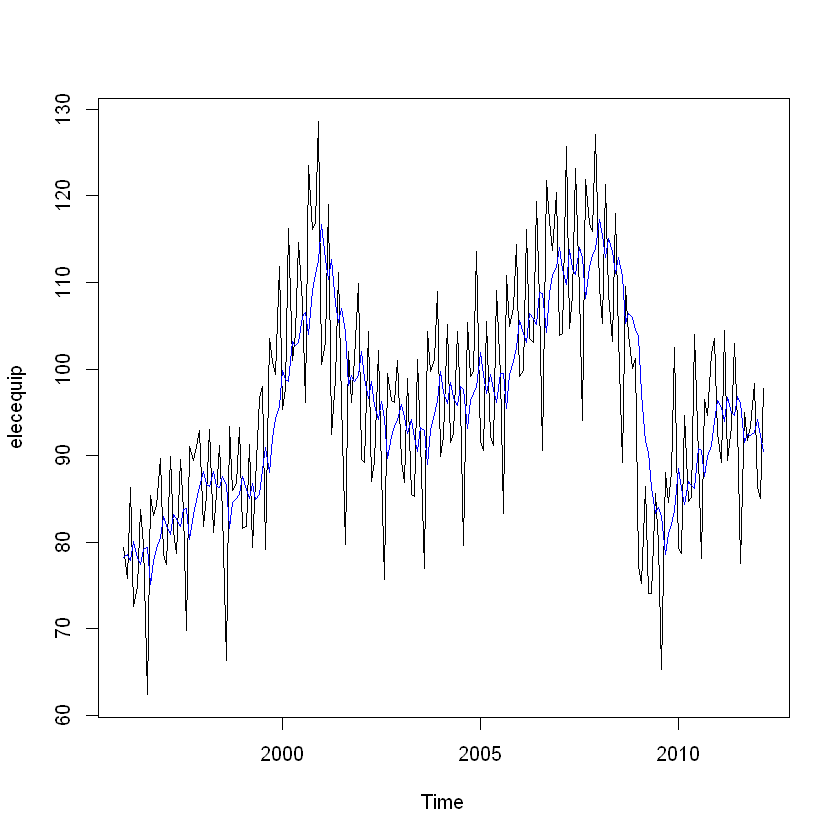

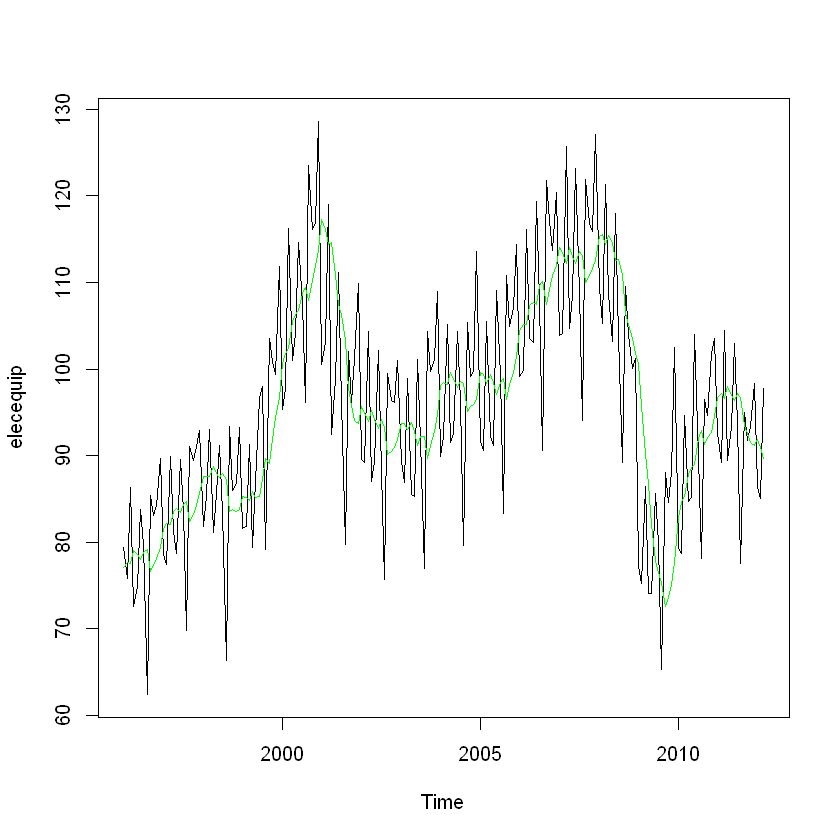

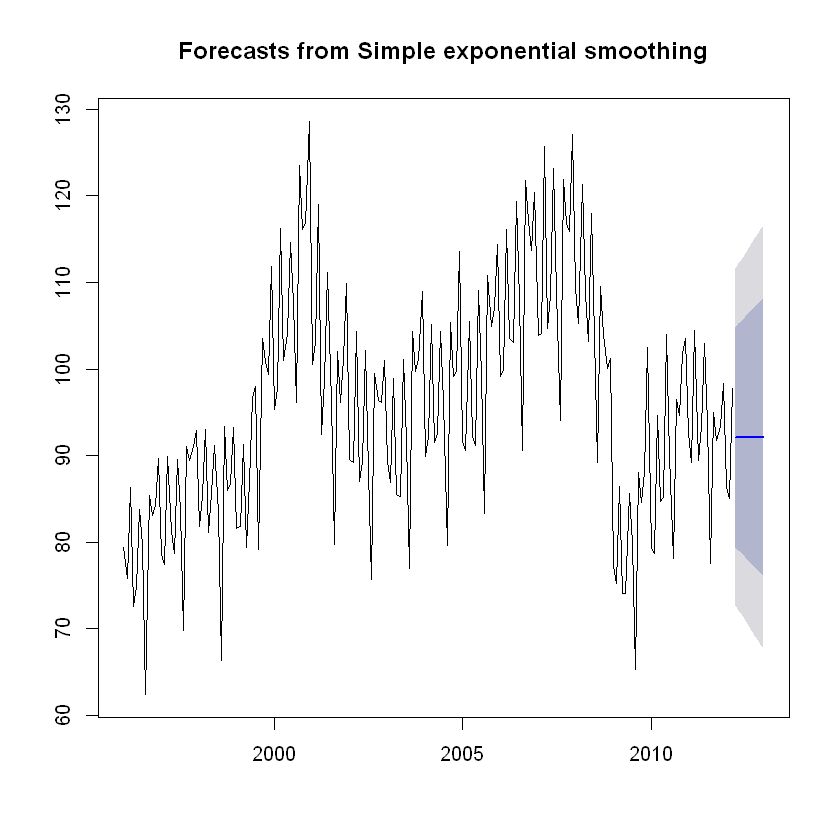

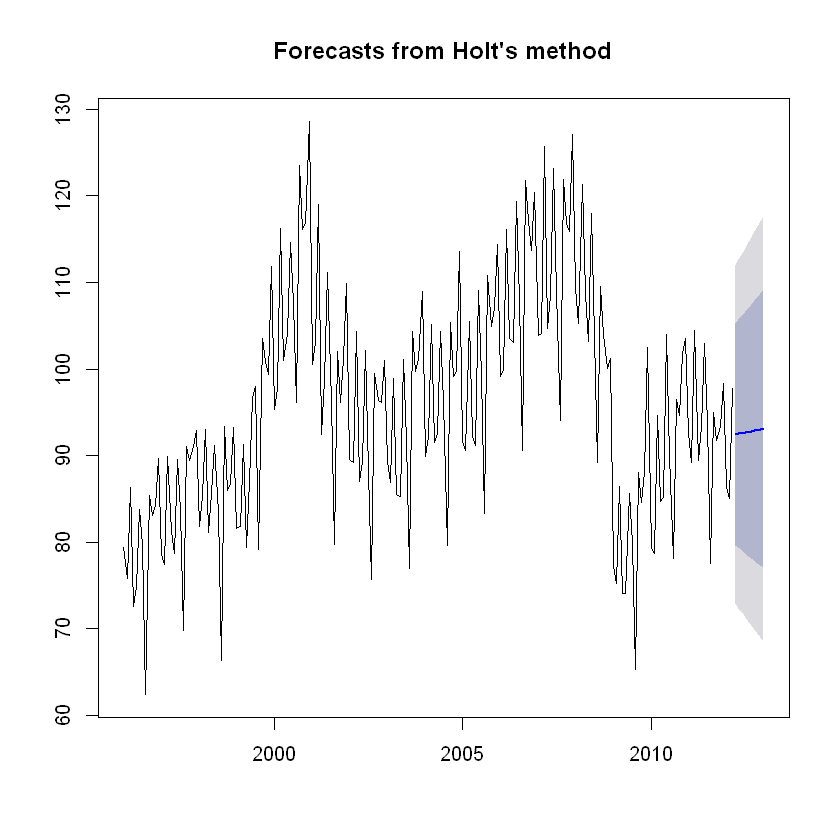

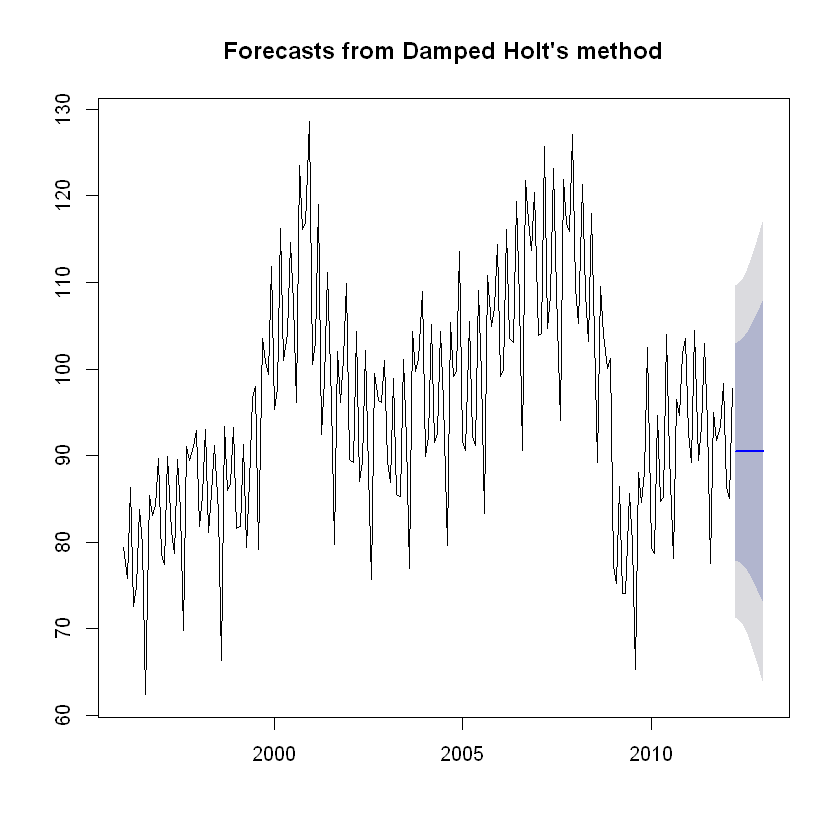

In [10]:
# 단순지수평활법
ses_fit<-ses(elecequip, initial='optimal')
# 홀트선형지수평활법
holt_fit<-holt(elecequip)
# 홀트선형지수평활법(감쇠추세법)
holt_d_fit<-holt(elecequip, damped=TRUE)

# 각 모형의 적합된 값 시각화
plot(elecequip)
lines(ses_fit$fitted, col='red')

plot(elecequip)
lines(holt_fit$fitted, col='blue')

plot(elecequip)
lines(holt_d_fit$fitted, col='green')

# 예측값 시각화해보기
plot(ses_fit)
plot(holt_fit)
plot(holt_d_fit)

In [23]:
summary(holt_fit)
summary(holt_d_fit)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = elecequip) 

  Smoothing parameters:
    alpha = 0.2533 
    beta  = 1e-04 

  Initial states:
    l = 78.1209 
    b = 0.0719 

  sigma:  9.9615

     AIC     AICc      BIC 
1930.698 1931.015 1947.063 

Error measures:
                      ME     RMSE      MAE        MPE     MAPE     MASE
Training set -0.01123984 9.858817 8.290405 -0.9445368 8.867907 1.014473
                    ACF1
Training set -0.08495587

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Apr 2012       92.44339 79.67720 105.2096 72.91918 111.9676
May 2012       92.51510 79.34541 105.6848 72.37379 112.6564
Jun 2012       92.58682 79.02531 106.1483 71.84629 113.3273
Jul 2012       92.65853 78.71593 106.6011 71.33516 113.9819
Aug 2012       92.73024 78.41640 107.0441 70.83911 114.6214
Sep 2012       92.80195 78.12598 107.4779 70.35698 115.2469
Oct 2012       92.87367 77.84400 107.9033 69.88778 115.8596
Nov 2012  


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = elecequip, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.5113 
    beta  = 0.1612 
    gamma = 1e-04 

  Initial states:
    l = 81.8063 
    b = -0.0386 
    s = 11.2758 3.805 2.8582 7.3461 -16.564 -1.3186
           7.733 -4.9776 -6.232 7.9547 -6.2367 -5.6438

  sigma:  3.4269

     AIC     AICc      BIC 
1525.892 1529.349 1581.533 

Error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.002642667 3.283348 2.509203 0.01654666 2.667465 0.3070439
                    ACF1
Training set -0.02726879

Forecasts:
         Point Forecast    Lo 80     Hi 80     Lo 95     Hi 95
Apr 2012       83.78601 79.39420  88.17782 77.069312  90.50271
May 2012       85.08560 79.79313  90.37807 76.991470  93.17973
Jun 2012       97.84029 91.40493 104.27564 87.998256 107.68231
Jul 2012       88.83274 81.05452  96.61095 76.936985 10

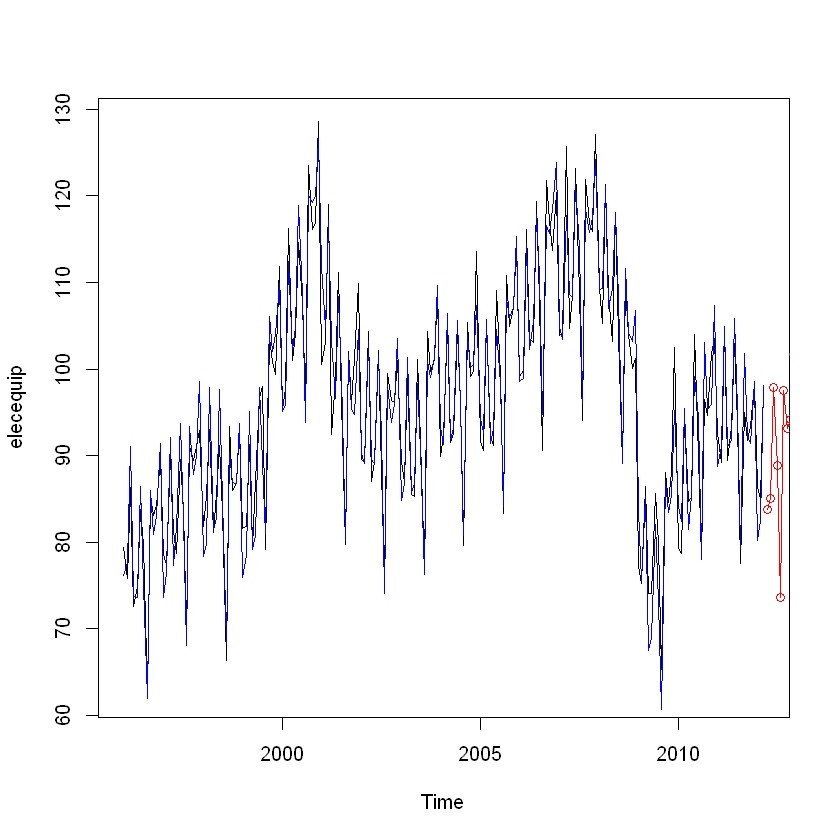

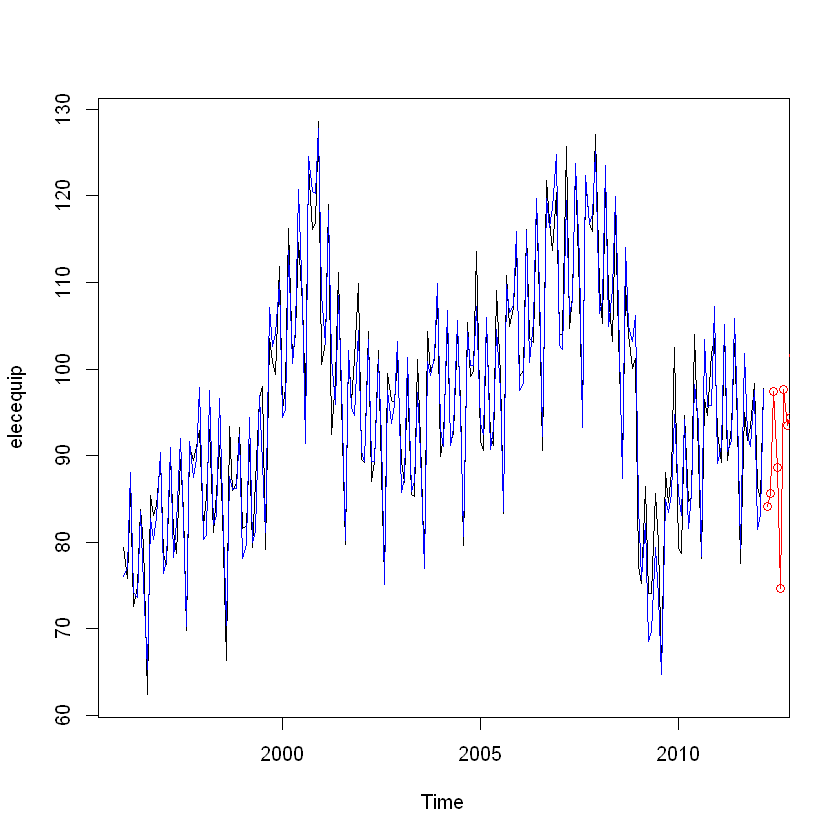

In [11]:
# 홀트윈터스 모형 선정하기 -> 원데이터가 일정한 그래프를 그리므로 '가법'이 적절할 것으로 예상

# 가법모형
hw_a<-hw(elecequip, seasonal='additive')
# 승법모형
hw_m<-hw(elecequip, seasonal='multiplicative')

# 각 모형의 RMSE값 관찰 위해 요약값 확인
summary(hw_a)
summary(hw_m)

# 각 모형에다가 원데이터, 적합된 데이터, 예측값 확인
plot(elecequip)
lines(hw_a$fitted, col='blue')
lines(hw_a$mean, col='red', type='o')

plot(elecequip)
lines(hw_m$fitted, col='blue')
lines(hw_m$mean, col='red', type='o')

# 예상과달리 승법모형의 RMSE값이 더 낮음..!

In [19]:
# ETS모형중 선정
# Error : 가법/승법 모두 해보기
# Trend : 추세없는 것으로 판단되어 'N'
# Seasonal : M/A/N 모두 해보기

ets_1<-ets(elecequip, model='ANA')
ets_2<-ets(elecequip, model='ANN')
ets_3<-ets(elecequip, model='MNM')
ets_4<-ets(elecequip, model='MNA')
ets_5<-ets(elecequip, model='ZZZ')
ets_6<-ets(elecequip, model='AAA')
ets_7<-ets(elecequip, model='MAM')

#각 모델종류에 따라 RMSE값 측정
summary(ets_1)
summary(ets_2)
summary(ets_3)
summary(ets_4)
summary(ets_5) # ZZZ로 했을 때 M Ad M 가장 rmse값 낮음
summary(ets_6)
summary(ets_7) # MAM 모델 가장 rmse값 낮음


ETS(A,N,A) 

Call:
 ets(y = elecequip, model = "ANA") 

  Smoothing parameters:
    alpha = 0.6916 
    gamma = 1e-04 

  Initial states:
    l = 88.9536 
    s = 11.4384 3.9695 2.7664 7.3624 -16.6064 -1.4326
           7.9504 -4.9954 -6.2941 7.8601 -6.0984 -5.9204

  sigma:  3.4481

     AIC     AICc      BIC 
1526.457 1529.138 1575.552 

Training set error measures:
                      ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.009892728 3.322006 2.543324 -0.05563148 2.687628 0.3112191
                    ACF1
Training set -0.04019928
ETS(A,N,N) 

Call:
 ets(y = elecequip, model = "ANN") 

  Smoothing parameters:
    alpha = 0.2535 

  Initial states:
    l = 78.775 

  sigma:  9.9116

     AIC     AICc      BIC 
1926.771 1926.896 1936.590 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set 0.2707376 9.860665 8.287598 -0.6489085 8.843105 1.014129
                    ACF1
Training set -0.08547317
E

In [20]:
# MAdM 모델 vs MAM 모델 비교 (감쇠추세법 유무 차이)
summary(ets_5)
summary(ets_7)

# 파라미터값이 똑같으므로 rmse값도 동일할 수 밖에 없음
# 둘중 아무거나 선택해도 무방
# MAM모델로 선정!

ETS(M,Ad,M) 

Call:
 ets(y = elecequip, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.5726 
    beta  = 0.1111 
    gamma = 2e-04 
    phi   = 0.977 

  Initial states:
    l = 78.39 
    b = -0.1078 
    s = 1.1168 1.0401 1.0307 1.0767 0.8242 0.9855
           1.0815 0.9479 0.9309 1.083 0.9367 0.9461

  sigma:  0.0345

     AIC     AICc      BIC 
1508.383 1512.269 1567.297 

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.006442666 3.101171 2.347102 0.01002857 2.491677 0.2872081
                   ACF1
Training set 0.00895978
ETS(M,Ad,M) 

Call:
 ets(y = elecequip, model = "MAM") 

  Smoothing parameters:
    alpha = 0.5726 
    beta  = 0.1111 
    gamma = 2e-04 
    phi   = 0.977 

  Initial states:
    l = 78.39 
    b = -0.1078 
    s = 1.1168 1.0401 1.0307 1.0767 0.8242 0.9855
           1.0815 0.9479 0.9309 1.083 0.9367 0.9461

  sigma:  0.0345

     AIC     AICc      BIC 
1508.383 1512.269 1567.297 

T

In [22]:
train<-window(elecequip, start=c(1996,1), end=c(2009,12))
test<-window(elecequip, start=c(2010,1), end=c(2012,3))
train
test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,79.35,75.78,86.32,72.60,74.86,83.81,79.80,62.41,85.41,83.11,84.21,89.70
1997,78.64,77.42,89.86,81.27,78.68,89.51,83.67,69.80,91.09,89.43,91.04,92.87
1998,81.87,85.36,92.98,81.09,85.64,91.14,83.46,66.37,93.34,85.93,86.81,93.30
1999,81.59,81.77,91.24,79.45,86.99,96.60,97.99,79.13,103.56,100.89,99.40,111.80
2000,95.30,97.77,116.23,100.98,104.07,114.64,107.62,96.12,123.50,116.12,116.86,128.61
2001,100.56,103.05,119.06,92.46,98.75,111.14,96.13,79.72,102.07,96.18,101.26,109.85
2002,89.52,89.27,104.35,87.05,89.33,102.20,88.13,75.68,99.48,96.40,96.16,101.00
2003,89.34,86.91,98.90,85.54,85.25,101.14,91.80,76.98,104.33,99.72,101.06,109.00
2004,89.88,92.27,105.11,91.50,92.56,104.35,96.21,79.58,105.43,99.18,99.77,113.55
2005,91.65,90.56,105.52,92.18,91.22,109.04,99.26,83.36,110.80,104.95,107.07,114.40


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,79.28,78.74,94.62,84.66,85.20,103.94,89.87,78.14,96.50,94.68,101.77,103.48
2011,92.57,89.16,104.48,89.45,93.40,102.90,93.77,77.58,95.04,91.77,93.37,98.34
2012,86.44,85.04,97.80,,,,,,,,,


In [35]:
# 미래예측값을 test데이터와 가장 RMSE값이 낮은 모델 선정해보기
ses_fit<-ses(train, initial='optimal', h=27)
holt_d_fit<-holt(train, damped=TRUE, h=27)
hw_fit<-hw(train, seasonal='multiplicative',h=27)
ets_fit<-ets(train, model='MAM')


In [38]:
for_ses<-forecast(ses_fit, h=27)
for_holt_d<-forecast(holt_d_fit,h=27)
for_hw<-forecast(hw_fit,h=27)
for_ets<-forecast(ets_fit,h=27)

accuracy(for_ses, test)
accuracy(for_holt_d, test)
accuracy(for_hw, test)
accuracy(for_ets, test) 

# ses, holt 모형은 Train RMSE가 더 높아서 탈락
# hw와 ETS 모형 중 rmse값의 차이가 그나마 더 적은 ETS모형으로 선택

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.2180103,10.07878,8.515472,-0.7352083,9.051876,1.0225725,-0.08414145,NA
Test set,3.5140734,8.68927,7.381618,3.0781553,7.919148,0.8864147,0.02693508,0.7753507


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.2255465,9.910445,8.464073,-0.5993288,9.00458,1.0164003,-0.02604975,NA
Test set,-1.8728446,7.445504,6.069979,-2.6850426,6.81647,0.7289077,-0.10940309,0.6684652


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1115814,3.046403,2.352232,0.12380,2.490351,0.2824655,0.04848112,NA
Test set,-31.5142823,37.386523,31.514282,-34.05358,34.053582,3.7843629,0.83521770,3.38819


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.07940624,3.018334,2.311783,0.08779281,2.443031,0.2776083,0.0157107,NA
Test set,-20.47993793,23.632148,20.479938,-22.15611285,22.156113,2.4593141,0.7995558,2.143943


In [39]:
# 벤치마크 기준 예측법으로 해보기
mean<-meanf(train, h=27)
naive<-naive(train, h=27)
snaive<-snaive(train, h=27)
rwf<-rwf(train, h=27)
rwf_d<-rwf(train, drift=TRUE, h=27)

accuracy(mean, test)
accuracy(naive, test)
accuracy(snaive, test) # snaive의 RMSE값이 가장 이상적!
accuracy(rwf, test)
accuracy(rwf_d, test)



,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.776357e-15,13.733486,11.335709,-2.112336,12.147609,1.3612379,0.54941983,NA
Test set,-4.364206e+00,9.066477,7.245088,-5.558476,8.358737,0.8700196,0.02693508,0.7737365


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1387425,13.00129,10.57659,-0.7796682,11.05941,1.270079,-0.42123354,NA
Test set,-10.5944444,13.24375,10.94407,-12.3884282,12.72466,1.314209,0.02693508,1.135259


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1539103,11.37040,8.32750,-0.5470708,8.811601,1.000000,0.9253249,NA
Test set,10.3807407,11.75639,10.69037,11.2830907,11.597947,1.283743,0.3968482,1.049681


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1387425,13.00129,10.57659,-0.7796682,11.05941,1.270079,-0.42123354,NA
Test set,-10.5944444,13.24375,10.94407,-12.3884282,12.72466,1.314209,0.02693508,1.135259


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.957516e-15,13.00055,10.58074,-0.9266344,11.07244,1.270578,-0.421233543,NA
Test set,-1.253684e+01,14.76131,12.58036,-14.4931737,14.53505,1.510701,0.007787585,1.274593


# ETS모형을 쓰는 것보다 snavie로 예측하는 것이 더 정확도 높음!!

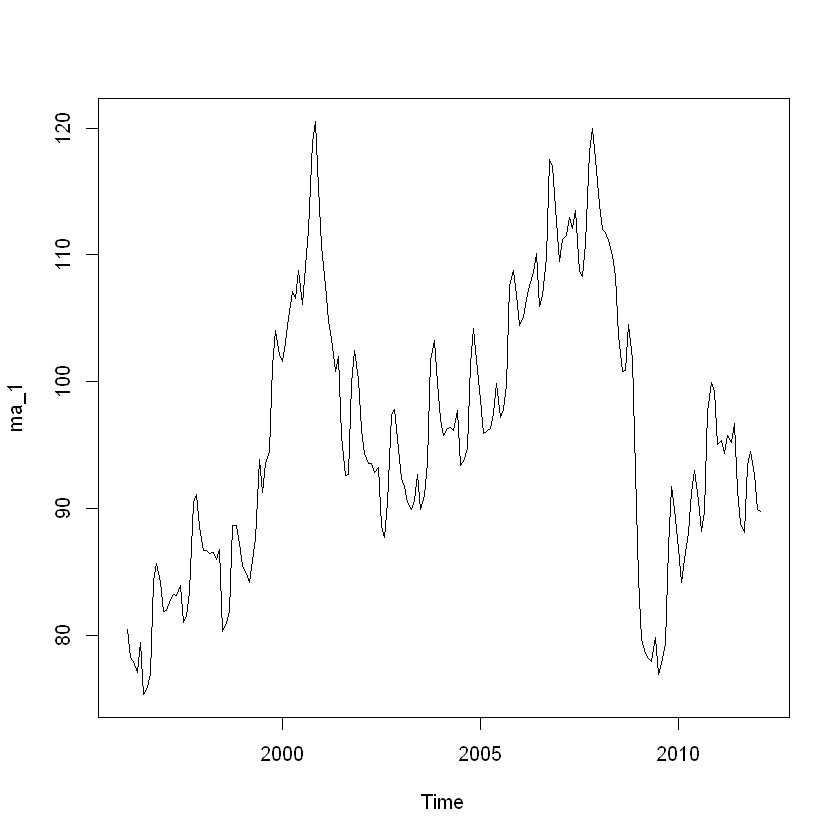

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  75.34   87.76   94.73   95.79  104.03  120.53       2 

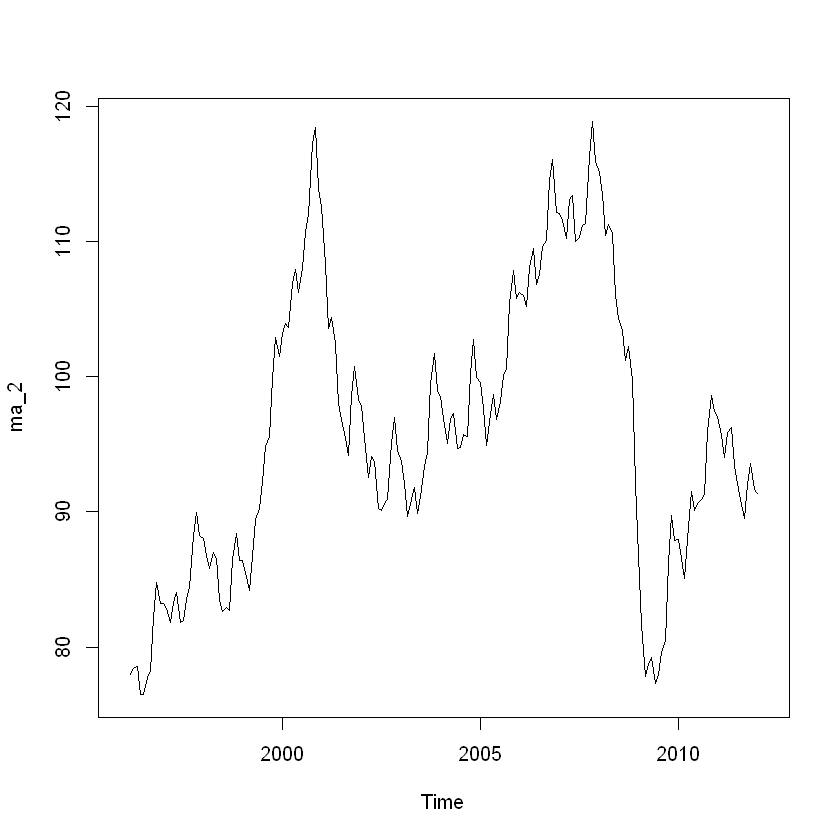

In [43]:
#분해해보기
#이동평균으로 분해
ma_1<-ma(elecequip, order=3)
ma_2<-ma(elecequip, order=4, centre=TRUE)
plot(ma_1)
plot(ma_2)

In [49]:
# 전통적인 분해법으로 분해해보기
d_1<-decompose(elecequip, type='additive')
summary(d_1)

d_2<-decompose(elecequip, type='multiplicative')
summary(d_2)

         Length Class  Mode     
x        195    ts     numeric  
seasonal 195    ts     numeric  
trend    195    ts     numeric  
random   195    ts     numeric  
figure    12    -none- numeric  
type       1    -none- character

         Length Class  Mode     
x        195    ts     numeric  
seasonal 195    ts     numeric  
trend    195    ts     numeric  
random   195    ts     numeric  
figure    12    -none- numeric  
type       1    -none- character

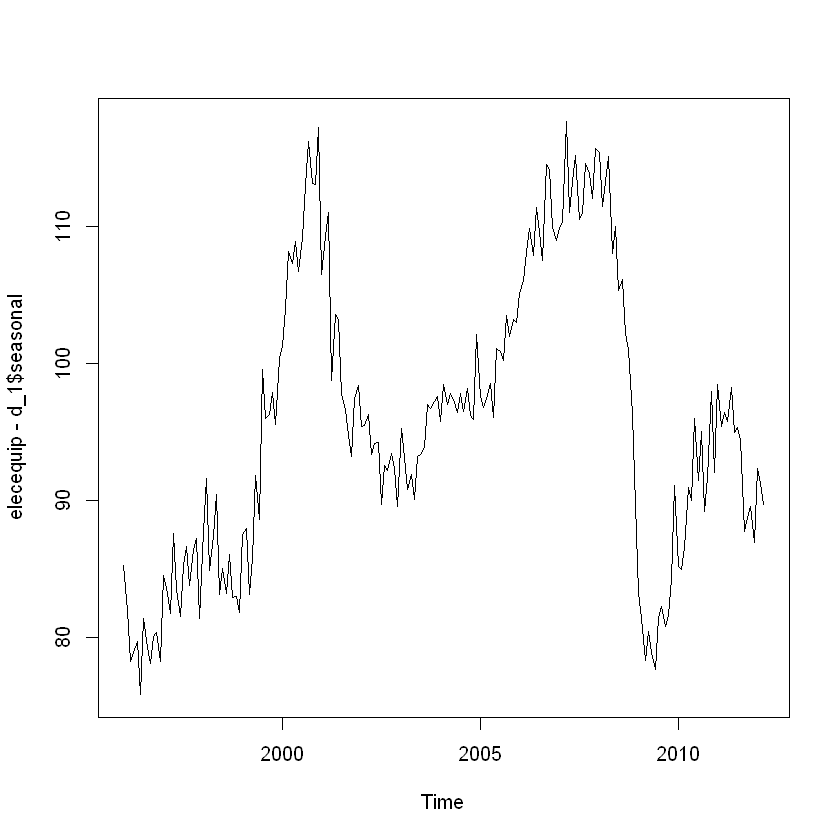

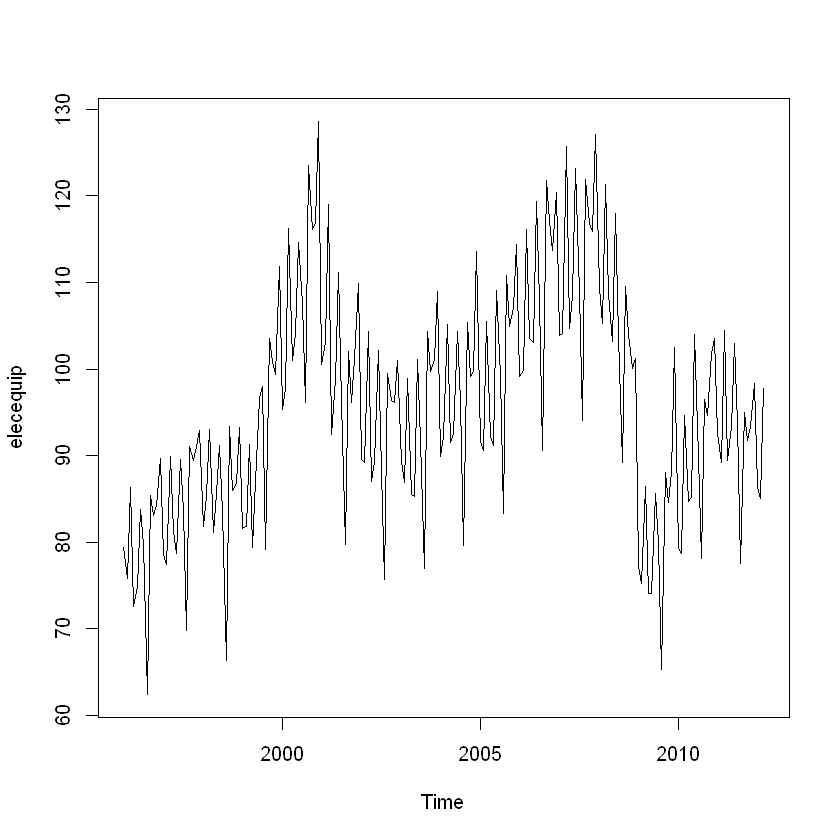

In [53]:
plot(elecequip-d_1$seasonal)
plot(elecequip)


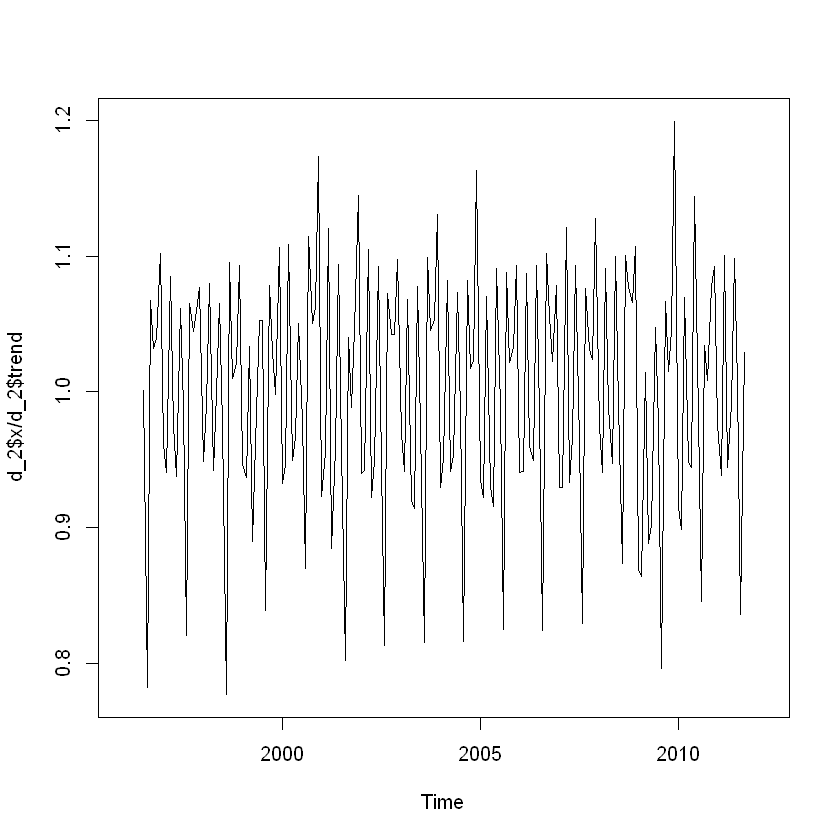

In [55]:
plot(d_2$x/d_2$trend)

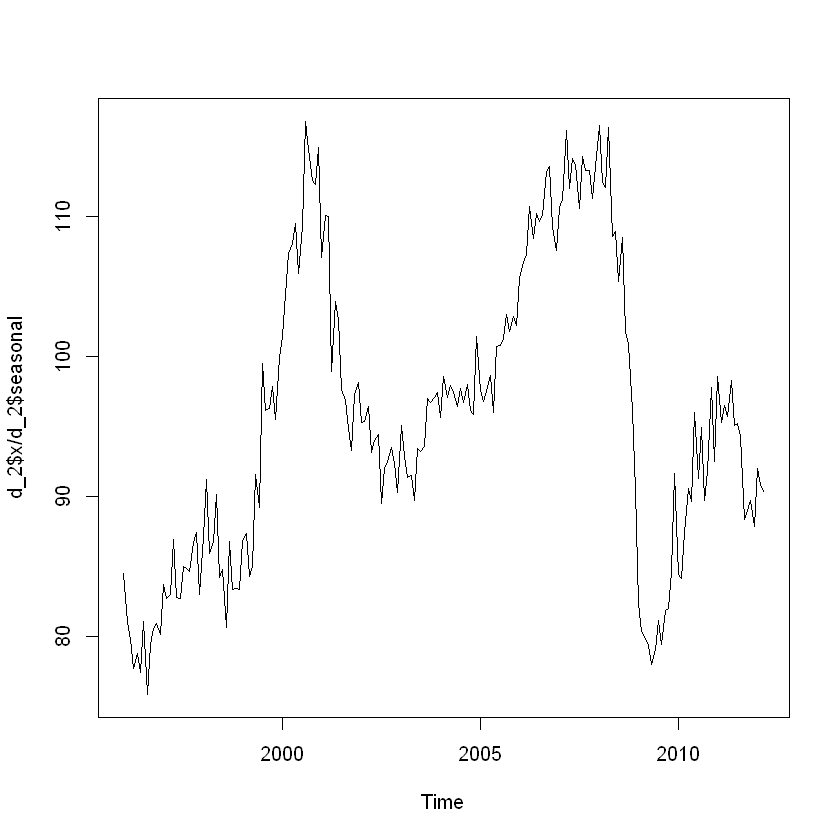

In [57]:
plot(d_2$x/d_2$seasonal)